In [209]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold
import matplotlib.pyplot as plt
import math

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
# Import data into dataframes
df = pd.read_csv('hw2_data.csv', sep = ',')
#df.iloc[:,8]
df

,name,stamina,attack_value,defense_value,capture_rate,flee_rate,spawn_chance,primary_strength,combat_point
0,Bulbasaur,90,126,126,0.16,0.10,69.00,Grass,1079
1,Ivysaur,120,156,158,0.08,0.07,4.20,Grass,1643
2,Venusaur,160,198,200,0.04,0.05,1.70,Grass,2598
3,Charmander,78,128,108,0.16,0.10,25.30,Fire,962
4,Charmeleon,116,160,140,0.08,0.07,1.20,Fire,1568
...,...,...,...,...,...,...,...,...,...
141,Aerodactyl,160,182,162,0.16,0.09,1.80,Rock,2180
142,Snorlax,320,180,180,0.16,0.09,1.60,Normal,3135
143,Dratini,82,128,110,0.32,0.09,30.00,Dragon,990
144,Dragonair,122,170,152,0.08,0.06,2.00,Dragon,1760


In [ ]:
#2ii) 2-D Scatterplot and Correlation Coefficient

In [27]:
# Computer pearson's correlation coefficient between all features and the outcome of interest
for i in range(1,7):
    corr, p = pearsonr(df.iloc[:,i], df.iloc[:,8])
    print("%0.3f\t\t" % corr, df.columns[i] )

0.583		 stamina
0.908		 attack_value
0.826		 defense_value
-0.743		 capture_rate
-0.407		 flee_rate
-0.421		 spawn_chance


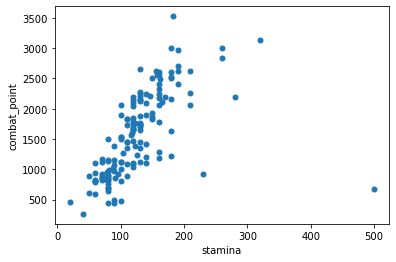

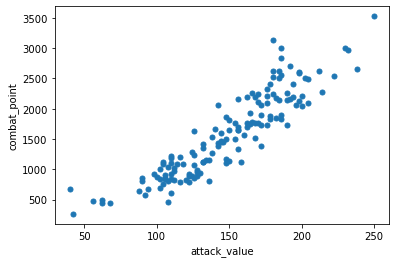

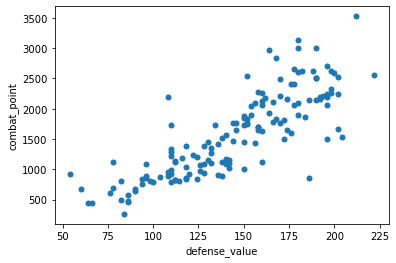

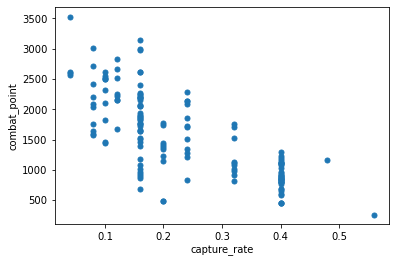

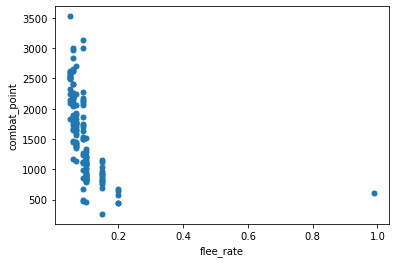

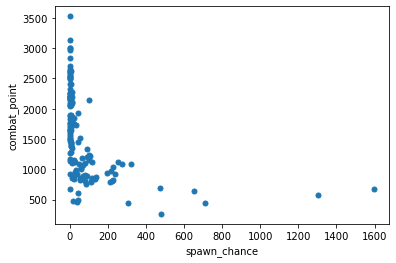

In [28]:
# Computer scatter plots between all features and the outcome of interest
for i in range(1,7):
    plt.figure()
    plt.plot(df.iloc[:,i], df.iloc[:,8], marker='o', linestyle='', markersize=5)
    #plt.legend()
    plt.xlabel(df.columns[i])
    plt.ylabel(df.columns[8])
    plt.show()

In [ ]:
######### 2biii) ###############

In [32]:
print("Correlation Matrix")
print(df.corr(method='pearson'))
print()


Correlation Matrix
                stamina  attack_value  defense_value  capture_rate  flee_rate  \
stamina        1.000000      0.302995       0.302663     -0.446850  -0.271048   
attack_value   0.302995      1.000000       0.736777     -0.690573  -0.369064   
defense_value  0.302663      0.736777       1.000000     -0.697266  -0.423860   
capture_rate  -0.446850     -0.690573      -0.697266      1.000000   0.440512   
flee_rate     -0.271048     -0.369064      -0.423860      0.440512   1.000000   
spawn_chance  -0.276420     -0.432648      -0.432499      0.472793   0.293222   
combat_point   0.582832      0.907532       0.826229     -0.743008  -0.407034   

               spawn_chance  combat_point  
stamina           -0.276420      0.582832  
attack_value      -0.432648      0.907532  
defense_value     -0.432499      0.826229  
capture_rate       0.472793     -0.743008  
flee_rate          0.293222     -0.407034  
spawn_chance       1.000000     -0.421327  
combat_point      -0.421

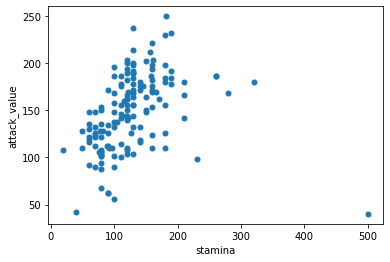

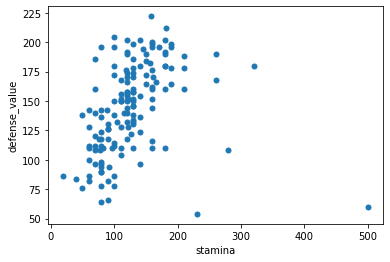

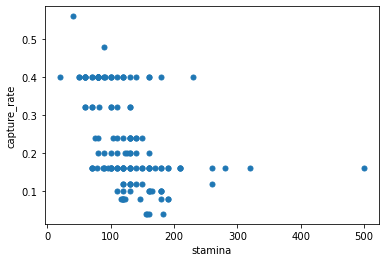

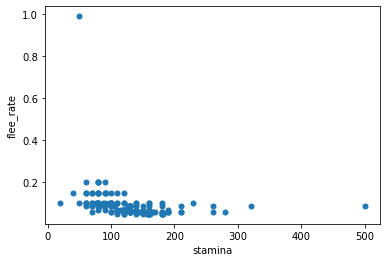

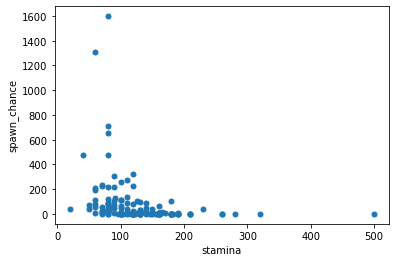

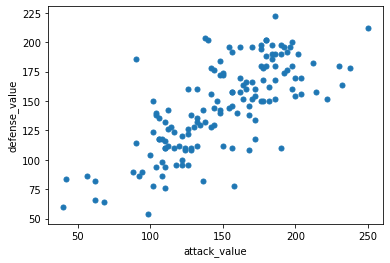

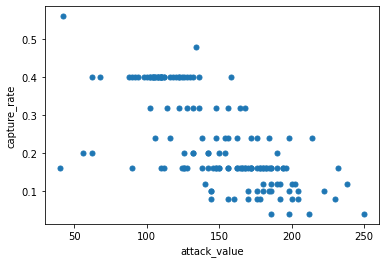

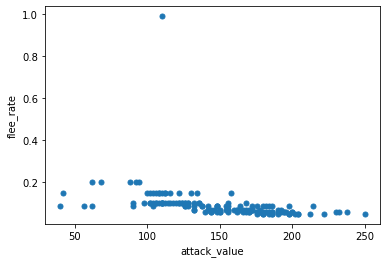

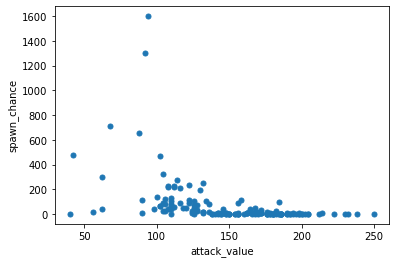

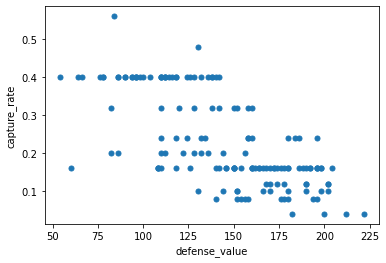

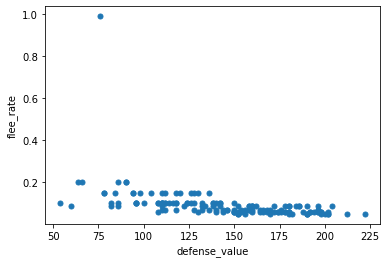

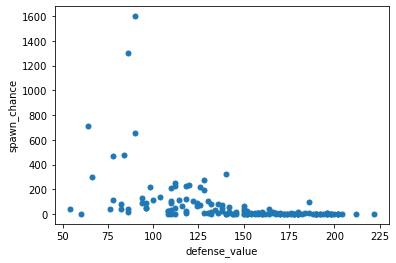

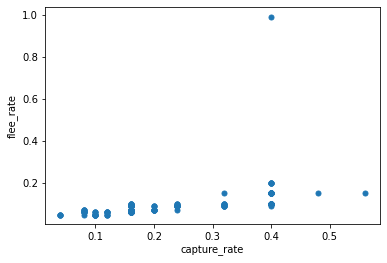

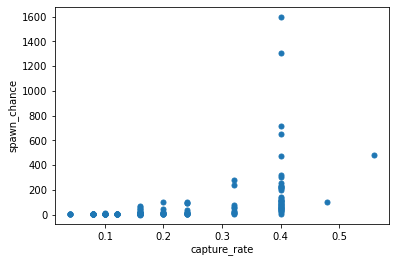

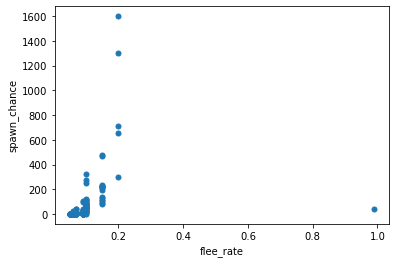

In [37]:
# Computer scatter plots between all features and the outcome of interest
for i in range(1,7):
    for j in range(i+1,7):
        plt.figure()
        plt.plot(df.iloc[:,i], df.iloc[:,j], marker='o', linestyle='', markersize=5)
        #plt.legend()
        plt.xlabel(df.columns[i])
        plt.ylabel(df.columns[j])
        plt.show()

In [ ]:
######  2iv) Pre-Processing of Categorical Variables  #######

In [38]:
print (df['primary_strength'].unique())

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon']


In [397]:
#get dummy variables from categorical values
y = pd.get_dummies(df.primary_strength, prefix='primary_strength')
#print(y)
one_hot_encode = pd.concat([df, y], axis=1)
one_hot_encode
one_hot_encode1 = one_hot_encode.drop(columns=['name', 'primary_strength'])

one_hot_encode2 = one_hot_encode1.pop('combat_point')
one_hot_encode3 = pd.concat([one_hot_encode1, one_hot_encode2], 1)
df_complete = one_hot_encode3
#print(df_complete)

In [ ]:
#### 2v) Implementation of Linear Regression and 5 Fold cross validation ####

In [123]:
# Implementaion of Linear Regression as a function. I later call this function in the cross validation function

#get X and Y from dataset as vectors
data = df_complete

def LR(data,alpha = 0): 
    #data = np.array(data)
    X = np.array([x[:-1] for x in data])
    intercept = np.ones((X.shape[0],1))
    X = np.concatenate((intercept,X),1)
    Y = np.array([x[-1] for x in data]) #keep only y variables
    
    term1 = X.T.dot(X)
    term1_inv = np.linalg.pinv(term1)
    term2 = X.T.dot(Y)
    w = term1_inv.dot(term2)
    #print(w.shape)
    
    return w
#dataset = np.array(df_complete)
#LR(dataset)

In [398]:
dataset = df_complete
#print(df_complete)
#random.seed(3)

#this function produces a random split for the cross validation. It reshuffles the data into 5 parts
def cross_validation_split(dataset, folds):
        dataset_split = []
        df_copy = dataset
        #print(df_copy.shape[0])
        fold_size = int(df_copy.shape[0] / folds)
        
        # for loop to save each fold
        for i in range(folds):
            fold = []
            # while loop to add elements to the folds
            while len(fold) < fold_size:
                # select a random element
                r = random.randrange(df_copy.shape[0])
                #print(df_copy.shape[0])
                # determine the index of this element 
                index = df_copy.index[r]
                # save the randomly selected line 
                fold.append(df_copy.loc[index].values.tolist())
                # delete the randomly selected line from
                # dataframe not to select again
                df_copy = df_copy.drop(index)
            # save the fold     
            dataset_split.append(np.asarray(fold))
            
        return dataset_split
    
#a = cross_validation_split(dataset,5)
#print(type(a))
#print(len(a))
#print(a[0].shape)

#MAIN CROSS VALIDATION FUNCTION
def cross_val(dataset, reg_function, alpha, f=5):
    random.seed(3)
    rss_array = []
    #splits data into 5 equal parts
    folds = cross_validation_split(dataset,f)
    #print(type(folds))
        
    for index in range(5): #0,1,2,3,4
        folds_copy = folds.copy() #since folds in a list not an array 
        #print(len(folds_copy))
        #test data set
        testSet = np.array(folds_copy[index])
        #print(testSet.shape)
        #train data set
        folds_copy.pop(index)
        #print(folds_copy)
        
        #get 
        trainSet = np.array(folds_copy) 
        trainSet = np.reshape(trainSet,(-1,trainSet.shape[-1])) #this reduces the dimension by 1
        #print(trainSet.shape)
        
        #predict outcome of interest based on x variables in test data
        intercept_test = np.ones((testSet.shape[0],1))
        testX = [x[:-1] for x in testSet] #drop last value which is outcome
        #print(testX)
        X_test = np.concatenate((intercept_test,testX),1)
        
        #print(type(trainSet))
        #print(trainSet.shape)
        #print(len(trainSet))
        #print(trainSet)
        Y_pred = np.matmul(X_test,np.transpose(reg_function(trainSet,alpha)))
        #print(Y_pred.shape)
        #print(len(testSet[:,-1]))

        
        #for each fold, compute RSS sqrt
        rss = np.sum(np.square(Y_pred - testSet[:,-1]))
        rss_sqrt = math.sqrt(rss)
        rss_array.append(rss_sqrt)
        
    #print(len(rss_array))
    mean_RSS = sum(rss_array) / len(rss_array)
        
    return mean_RSS
print(cross_val(dataset,LR,0,5))


812.6837594419285


In [149]:
#### 2vi) Implementation of Linear Regression with l2-norm regularization####

#the only thing I changed from part v is the Linear Regression function. I use the closed form solution for l2-norm

def LR_Regularization(data, alpha): 
    #data = np.array(data)
    X = np.array([x[:-1] for x in data])
    intercept = np.ones((X.shape[0],1))
    X = np.concatenate((intercept,X),1)
    Y = np.array([x[-1] for x in data]) #keep only y variables
    
    
    identity = np.identity(X.shape[1])
    term1 = X.T.dot(X) + alpha*identity
    term1_inv = np.linalg.pinv(term1)
    term2 = X.T.dot(Y)
    w = term1_inv.dot(term2)
    #print(w.shape)
    return w

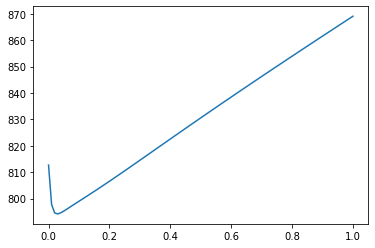

In [177]:
#a = [x * 0.01 for x in range(0, 101)]
a = [x * 0.01 for x in range(0, 101)]
#print(a)
b = []
for i in a:
    #print(cross_val(dataset,LR_Regularization,i,5))
    b.append((cross_val(dataset,LR_Regularization,i,5),i))
#print(b)    
data =  b

x_val = [x[1] for x in data]
y_val = [x[0] for x in data]

plt.plot(x_val,y_val)
plt.show()


In [238]:
############((2viii)Logistic Regression on test data #########

In [375]:

#X is inputs
#y is outcome
X = df_complete.iloc[:, :-1]
#print(X)
y = df_complete.iloc[:,-1]
#print(y)

random.seed(3) 
# Dividing the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

# Binary output
mean_thres = np.mean(y_train)
trainY_bin = (y_train > mean_thres).astype(np.int_)
testY_bin = (y_test > mean_thres).astype(np.int_)

# Logistic Regression using scikit.learn

# Train the model
logreg = LogisticRegression(penalty='none')
logreg.fit(X_train,trainY_bin)

# Predict using test data
y_pred=logreg.predict(X_test)

print('Coefficient of features: \n', logreg.coef_)
print("Accuracy:",metrics.accuracy_score(testY_bin, y_pred))

Coefficient of features: 
 [[    2.38069037    12.74576815     4.83629288 -1041.58384894
   -434.33155657    -5.30446774  -230.75431213  -142.42425372
    -27.27573695    -4.6112974   -621.7698875   -316.42507248
      8.99158383   374.45027497  -384.25872819   296.67364415
     90.89420158  -140.12023892  -437.24538032  -701.83269046
   -222.69983659]]
Accuracy: 0.9


In [376]:
###### (ix) Run logistic regression with regularization ##########

In [394]:
#X is inputs
#y is outcome
X = df_complete.iloc[:, :-1]
#print(X)
y = df_complete.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1) #this ensures same
#test train split is used from last question 

#print(len(X_train))
#print(len(y_train))

# Binary outputs for final testing
mean_thres = np.mean(y_train)
trainY_bin_main = (y_train > mean_thres).astype(np.int_)
testY_bin_main = (y_test > mean_thres).astype(np.int_)

#### Finding optimal hyperparameter using training dataset with 5 fold cross validation ####
random_state = 1 
rkf = KFold(n_splits=5, shuffle = True, random_state=random_state)

L = [0.000001,0.001,0.001, 0.005, 0.01, 0.1, 0.5,1,2]
# L = [0.01, 0.1, 1, 10]
cross_val = []


for index in range(len(L)): #each of the alpha values
    #print("alpha",index)
    accuracy = []
    
    for train, test in rkf.split(X_train): #produces 5 different splits of training data
    #print("here",len(train))
        #print(train,test)
    
        #print(len(X_train.values[train,:]))
        trainX = X_train.values[train,:]
        trainY = y_train.values[train]
    
        #print("here1",len(y_train.values[train]))

        devX = X_train.values[test,:]
        devY = y_train.values[test]

        mean_thres = np.mean(y_train)
        trainY_bin = (trainY > mean_thres).astype(np.int_)
        devY_bin = (devY > mean_thres).astype(np.int_)
        
    
        # Train the model
        #C parameter below takes into effect regularization
        logreg = LogisticRegression(penalty='l2', C=L[index], solver='lbfgs', max_iter = 1000)
        #print(len(trainX))
        #print(len(trainY_bin))
        logreg.fit(trainX,trainY_bin)

        # Predict on devset
        y_pred=logreg.predict(devX)
        
        acc_l = metrics.accuracy_score(devY_bin, y_pred)
        #print(acc_l)
        accuracy.append(acc_l)
    
    #print("hhhh",accuracy)    
    avg_acc = sum(accuracy) / len(accuracy)
    cross_val.append(avg_acc)
    #print(cross_val)

print(cross_val)


[0.8351449275362318, 0.9565217391304348, 0.9565217391304348, 0.9478260869565217, 0.9391304347826086, 0.9565217391304348, 0.9565217391304348, 0.9565217391304348, 0.9565217391304348]


In [395]:
bestidx = cross_val.index(max(cross_val))
print(bestidx)
print("Best L : ", L[bestidx], "\nAccuracy on Training Set: ", cross_val[bestidx])

1
Best L :  0.001 
Accuracy on Training Set:  0.9565217391304348


In [396]:
# Train the model
logreg = LogisticRegression(penalty='l2',C=L[bestidx], solver='lbfgs', max_iter = 10000)
logreg.fit(X_train,trainY_bin_main)

# Predict
y_pred=logreg.predict(X_test)

print('Coefficient : \n', logreg.coef_)
print("Accuracy Test:",metrics.accuracy_score(testY_bin_main, y_pred))

Coefficient : 
 [[ 2.77494410e-02  7.91020969e-02  3.86091724e-02 -1.90111119e-04
  -5.15486451e-05 -1.86229992e-02 -2.50978761e-04  9.70755155e-05
   2.44909289e-04 -1.17644567e-05 -1.30880572e-03 -2.02740023e-04
   5.46816423e-06  6.65887664e-04  9.23642959e-05  2.36786114e-04
   7.25521541e-04 -2.05112837e-04 -4.30177595e-05 -2.26374057e-04
   1.75813920e-04]]
Accuracy Test: 0.9666666666666667
